In [1]:
import torchvision
import  torch
from  torch import  nn,optim,cuda,from_numpy
from torch.utils import  data
from  torchvision import  datasets,transforms
import  torch.nn.functional as F
import matplotlib.pyplot as plt
import  numpy as np
import  cv2


In [2]:
device ='cuda' if cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
b_size = 64
train_dataset = datasets.KMNIST(root="Kmnist/",
                               train = True,
                               transform = transforms.ToTensor(),
                               download = True)

test_dataset = datasets.KMNIST(root = "Kmnist/",
                              train = False,
                              transform = transforms.ToTensor(),
                                    download =True)

train_data = data.DataLoader(train_dataset, batch_size=b_size, shuffle=True)
test_data = data.DataLoader(test_dataset, batch_size=b_size, shuffle=False)


# Filterlash
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


model = Net()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimize = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


def train(epoch):
    model.train()
    for b_i, data_ in enumerate(train_data):
        data_, label = data_[0].to(device), data_[1].to(device)
        optimize.zero_grad()
        predict = model(data_)
        fault = criterion(predict, label)
        fault.backward()
        optimize.step()

        if b_i % 10 == 0:
            print(f"Epoch - {epoch + 1} | Batch - {b_i} {b_i * len(data_)}/{len(train_data.dataset)} \
            | Loss: {fault.item()}")


def test():
    model.eval()
    Fault = 0
    Right = 0
    for img, label in test_data:
        img, label = img.to(device), label.to(device)
        predict = model(img)
        Fault += criterion(predict, label).item()
        result = predict.data.max(1, keepdim=True)[1]
        Right += result.eq(label.data.view_as(result)).cpu().sum()
    Fault /= (len(test_data.dataset))
    print(f"Aniqlik : {Right / len(test_data.dataset)}, Foizda {100.0 * Right / len(test_data.dataset)}%")


for epoch in range(10):
    train(epoch)
    test()


Epoch - 1 | Batch - 0 0/60000             | Loss: 2.295302391052246
Epoch - 1 | Batch - 10 640/60000             | Loss: 2.253974199295044
Epoch - 1 | Batch - 20 1280/60000             | Loss: 2.0371837615966797
Epoch - 1 | Batch - 30 1920/60000             | Loss: 1.6064443588256836
Epoch - 1 | Batch - 40 2560/60000             | Loss: 1.2698339223861694
Epoch - 1 | Batch - 50 3200/60000             | Loss: 1.5050033330917358
Epoch - 1 | Batch - 60 3840/60000             | Loss: 1.000544548034668
Epoch - 1 | Batch - 70 4480/60000             | Loss: 0.8222882151603699
Epoch - 1 | Batch - 80 5120/60000             | Loss: 0.7647256255149841
Epoch - 1 | Batch - 90 5760/60000             | Loss: 1.1698750257492065
Epoch - 1 | Batch - 100 6400/60000             | Loss: 1.0358848571777344
Epoch - 1 | Batch - 110 7040/60000             | Loss: 0.9418198466300964
Epoch - 1 | Batch - 120 7680/60000             | Loss: 0.7018620371818542
Epoch - 1 | Batch - 130 8320/60000             | Loss: 0

Epoch - 2 | Batch - 160 10240/60000             | Loss: 0.3213117718696594
Epoch - 2 | Batch - 170 10880/60000             | Loss: 0.2153426706790924
Epoch - 2 | Batch - 180 11520/60000             | Loss: 0.3487536311149597
Epoch - 2 | Batch - 190 12160/60000             | Loss: 0.17872413992881775
Epoch - 2 | Batch - 200 12800/60000             | Loss: 0.5955895185470581
Epoch - 2 | Batch - 210 13440/60000             | Loss: 0.32381683588027954
Epoch - 2 | Batch - 220 14080/60000             | Loss: 0.3008849620819092
Epoch - 2 | Batch - 230 14720/60000             | Loss: 0.2581630051136017
Epoch - 2 | Batch - 240 15360/60000             | Loss: 0.40626516938209534
Epoch - 2 | Batch - 250 16000/60000             | Loss: 0.2722955048084259
Epoch - 2 | Batch - 260 16640/60000             | Loss: 0.255614310503006
Epoch - 2 | Batch - 270 17280/60000             | Loss: 0.2811429798603058
Epoch - 2 | Batch - 280 17920/60000             | Loss: 0.35035082697868347
Epoch - 2 | Batch - 29

Epoch - 3 | Batch - 310 19840/60000             | Loss: 0.11348256468772888
Epoch - 3 | Batch - 320 20480/60000             | Loss: 0.16340422630310059
Epoch - 3 | Batch - 330 21120/60000             | Loss: 0.16187763214111328
Epoch - 3 | Batch - 340 21760/60000             | Loss: 0.23552699387073517
Epoch - 3 | Batch - 350 22400/60000             | Loss: 0.10563059896230698
Epoch - 3 | Batch - 360 23040/60000             | Loss: 0.24668537080287933
Epoch - 3 | Batch - 370 23680/60000             | Loss: 0.06827492266893387
Epoch - 3 | Batch - 380 24320/60000             | Loss: 0.06291711330413818
Epoch - 3 | Batch - 390 24960/60000             | Loss: 0.23495273292064667
Epoch - 3 | Batch - 400 25600/60000             | Loss: 0.22520646452903748
Epoch - 3 | Batch - 410 26240/60000             | Loss: 0.11598193645477295
Epoch - 3 | Batch - 420 26880/60000             | Loss: 0.2772071361541748
Epoch - 3 | Batch - 430 27520/60000             | Loss: 0.13130433857440948
Epoch - 3 | B

Epoch - 4 | Batch - 450 28800/60000             | Loss: 0.09898868948221207
Epoch - 4 | Batch - 460 29440/60000             | Loss: 0.07788211107254028
Epoch - 4 | Batch - 470 30080/60000             | Loss: 0.053578492254018784
Epoch - 4 | Batch - 480 30720/60000             | Loss: 0.09694335609674454
Epoch - 4 | Batch - 490 31360/60000             | Loss: 0.11880519241094589
Epoch - 4 | Batch - 500 32000/60000             | Loss: 0.1527276188135147
Epoch - 4 | Batch - 510 32640/60000             | Loss: 0.04867499694228172
Epoch - 4 | Batch - 520 33280/60000             | Loss: 0.16287699341773987
Epoch - 4 | Batch - 530 33920/60000             | Loss: 0.17960764467716217
Epoch - 4 | Batch - 540 34560/60000             | Loss: 0.2269182801246643
Epoch - 4 | Batch - 550 35200/60000             | Loss: 0.0827663466334343
Epoch - 4 | Batch - 560 35840/60000             | Loss: 0.37618231773376465
Epoch - 4 | Batch - 570 36480/60000             | Loss: 0.14944355189800262
Epoch - 4 | Ba

Epoch - 5 | Batch - 590 37760/60000             | Loss: 0.04652843251824379
Epoch - 5 | Batch - 600 38400/60000             | Loss: 0.12582243978977203
Epoch - 5 | Batch - 610 39040/60000             | Loss: 0.04943736270070076
Epoch - 5 | Batch - 620 39680/60000             | Loss: 0.12096785753965378
Epoch - 5 | Batch - 630 40320/60000             | Loss: 0.20870338380336761
Epoch - 5 | Batch - 640 40960/60000             | Loss: 0.09165579080581665
Epoch - 5 | Batch - 650 41600/60000             | Loss: 0.055820539593696594
Epoch - 5 | Batch - 660 42240/60000             | Loss: 0.12453632801771164
Epoch - 5 | Batch - 670 42880/60000             | Loss: 0.13124439120292664
Epoch - 5 | Batch - 680 43520/60000             | Loss: 0.2029494047164917
Epoch - 5 | Batch - 690 44160/60000             | Loss: 0.09570569545030594
Epoch - 5 | Batch - 700 44800/60000             | Loss: 0.13337679207324982
Epoch - 5 | Batch - 710 45440/60000             | Loss: 0.17255261540412903
Epoch - 5 | 

Epoch - 6 | Batch - 730 46720/60000             | Loss: 0.1358676254749298
Epoch - 6 | Batch - 740 47360/60000             | Loss: 0.22697773575782776
Epoch - 6 | Batch - 750 48000/60000             | Loss: 0.12923288345336914
Epoch - 6 | Batch - 760 48640/60000             | Loss: 0.5581284165382385
Epoch - 6 | Batch - 770 49280/60000             | Loss: 0.04821755737066269
Epoch - 6 | Batch - 780 49920/60000             | Loss: 0.04775114730000496
Epoch - 6 | Batch - 790 50560/60000             | Loss: 0.03501849249005318
Epoch - 6 | Batch - 800 51200/60000             | Loss: 0.0532585047185421
Epoch - 6 | Batch - 810 51840/60000             | Loss: 0.08694672584533691
Epoch - 6 | Batch - 820 52480/60000             | Loss: 0.1703975647687912
Epoch - 6 | Batch - 830 53120/60000             | Loss: 0.021359771490097046
Epoch - 6 | Batch - 840 53760/60000             | Loss: 0.099723219871521
Epoch - 6 | Batch - 850 54400/60000             | Loss: 0.040222764015197754
Epoch - 6 | Batc

Epoch - 7 | Batch - 870 55680/60000             | Loss: 0.09285598248243332
Epoch - 7 | Batch - 880 56320/60000             | Loss: 0.0916181206703186
Epoch - 7 | Batch - 890 56960/60000             | Loss: 0.17711509764194489
Epoch - 7 | Batch - 900 57600/60000             | Loss: 0.07866795361042023
Epoch - 7 | Batch - 910 58240/60000             | Loss: 0.14863938093185425
Epoch - 7 | Batch - 920 58880/60000             | Loss: 0.060399431735277176
Epoch - 7 | Batch - 930 59520/60000             | Loss: 0.09486652165651321
Aniqlik : 0.9383999705314636, Foizda 93.83999633789062%
Epoch - 8 | Batch - 0 0/60000             | Loss: 0.0199603084474802
Epoch - 8 | Batch - 10 640/60000             | Loss: 0.016340136528015137
Epoch - 8 | Batch - 20 1280/60000             | Loss: 0.009149856865406036
Epoch - 8 | Batch - 30 1920/60000             | Loss: 0.13298320770263672
Epoch - 8 | Batch - 40 2560/60000             | Loss: 0.15936148166656494
Epoch - 8 | Batch - 50 3200/60000             

Epoch - 9 | Batch - 60 3840/60000             | Loss: 0.02274242229759693
Epoch - 9 | Batch - 70 4480/60000             | Loss: 0.0983586236834526
Epoch - 9 | Batch - 80 5120/60000             | Loss: 0.09938792884349823
Epoch - 9 | Batch - 90 5760/60000             | Loss: 0.01832331158220768
Epoch - 9 | Batch - 100 6400/60000             | Loss: 0.07130235433578491
Epoch - 9 | Batch - 110 7040/60000             | Loss: 0.013947156257927418
Epoch - 9 | Batch - 120 7680/60000             | Loss: 0.031140778213739395
Epoch - 9 | Batch - 130 8320/60000             | Loss: 0.05195753648877144
Epoch - 9 | Batch - 140 8960/60000             | Loss: 0.07601405680179596
Epoch - 9 | Batch - 150 9600/60000             | Loss: 0.07467740774154663
Epoch - 9 | Batch - 160 10240/60000             | Loss: 0.07642744481563568
Epoch - 9 | Batch - 170 10880/60000             | Loss: 0.05116504803299904
Epoch - 9 | Batch - 180 11520/60000             | Loss: 0.0511309877038002
Epoch - 9 | Batch - 190 12

Epoch - 10 | Batch - 200 12800/60000             | Loss: 0.06581856310367584
Epoch - 10 | Batch - 210 13440/60000             | Loss: 0.01927763968706131
Epoch - 10 | Batch - 220 14080/60000             | Loss: 0.07214824110269547
Epoch - 10 | Batch - 230 14720/60000             | Loss: 0.08911675214767456
Epoch - 10 | Batch - 240 15360/60000             | Loss: 0.03632127493619919
Epoch - 10 | Batch - 250 16000/60000             | Loss: 0.1387261152267456
Epoch - 10 | Batch - 260 16640/60000             | Loss: 0.10840199887752533
Epoch - 10 | Batch - 270 17280/60000             | Loss: 0.015989098697900772
Epoch - 10 | Batch - 280 17920/60000             | Loss: 0.03711177408695221
Epoch - 10 | Batch - 290 18560/60000             | Loss: 0.045640669763088226
Epoch - 10 | Batch - 300 19200/60000             | Loss: 0.0958247110247612
Epoch - 10 | Batch - 310 19840/60000             | Loss: 0.09000765532255173
Epoch - 10 | Batch - 320 20480/60000             | Loss: 0.05764485895633697

In [4]:
torch.save(model.state_dict(),'K_Mnist.h5')

In [5]:
model.load_state_dict(torch.load('K_Mnist.h5'))
model.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


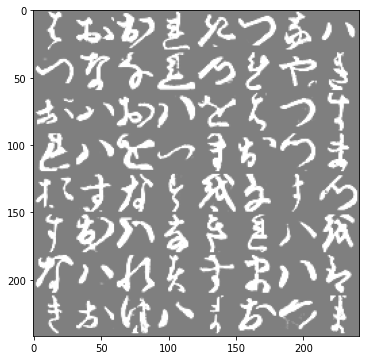

In [6]:
def imshow(img):
    plt.figure(figsize=(8,6))
    img = img / 1 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()


dataiter = iter(train_data)
images, labels = dataiter.next()


imshow(torchvision.utils.make_grid(images))
